In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
train = pd.read_csv('../data/public.train.csv')

In [3]:
train.head()

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,...,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向,发电量
0,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,...,1.34,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272,1.437752
1,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,...,1.55,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275,1.692575
2,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,...,1.75,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283,1.975787
3,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,...,2.02,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280,2.370656
4,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,...,2.13,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280,2.532091


In [4]:
train.shape

(9000, 21)

In [17]:
train.columns

Index(['ID', '板温', '现场温度', '光照强度', '转换效率', '转换效率A', '转换效率B', '转换效率C', '电压A',
       '电压B', '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C', '平均功率', '风速',
       '风向', '发电量'],
      dtype='object')

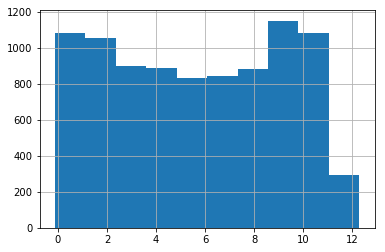

In [6]:
train['发电量'].hist()

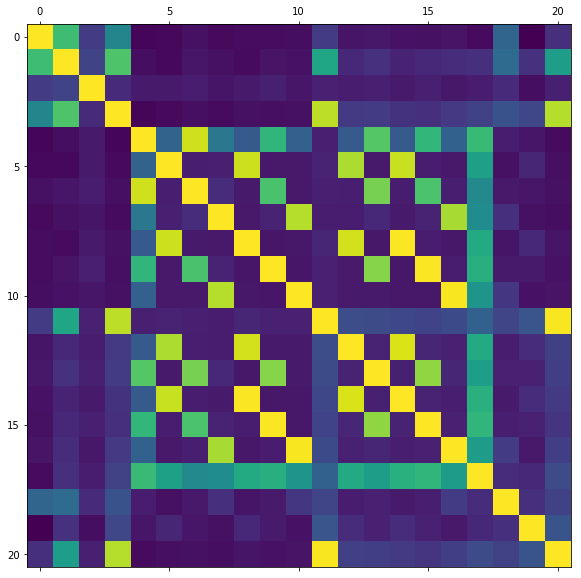

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(train.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a6f9208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ad93278>]], dtype=object)

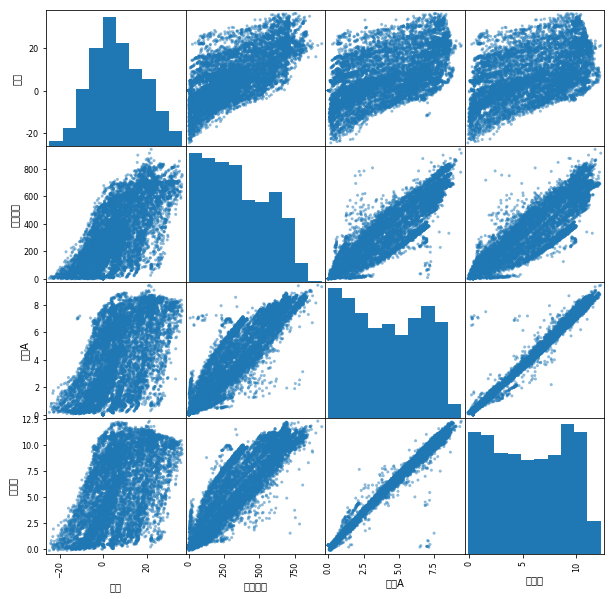

In [18]:
pd.plotting.scatter_matrix(train[['板温','光照强度','电流A','发电量']],figsize=(10,10))

In [5]:
train['转换效率A'].describe()

count     9000.000000
mean        52.906926
std        606.060373
min          0.000000
25%         20.460000
50%         25.020000
75%         36.532500
max      27472.310000
Name: 转换效率A, dtype: float64

In [12]:
train['转换效率A'].quantile(0.99)

330.96330000000023

In [8]:
train['现场温度'].describe()

count    9000.000000
mean       -0.629456
std        67.430126
min     -6321.700000
25%        -7.600000
50%        -2.400000
75%         8.100000
max        78.700000
Name: 现场温度, dtype: float64

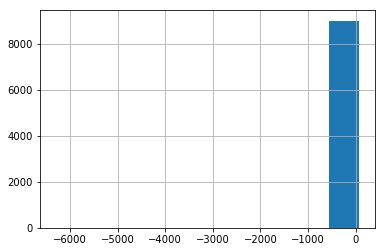

In [9]:
train['现场温度'].hist()

In [14]:
train['现场温度'].quantile(0.01)

-17.801000000000002

In [19]:
clean_df = train.copy()
clean_df['功率A'] = np.clip(clean_df['功率A'], clean_df['功率A'].quantile(0.01), clean_df['功率A'].quantile(0.99))
clean_df['功率B'] = np.clip(clean_df['功率B'], clean_df['功率B'].quantile(0.01), clean_df['功率B'].quantile(0.99))
clean_df['功率C'] = np.clip(clean_df['功率C'], clean_df['功率C'].quantile(0.01), clean_df['功率C'].quantile(0.99))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11233b9e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112c91320>]], dtype=object)

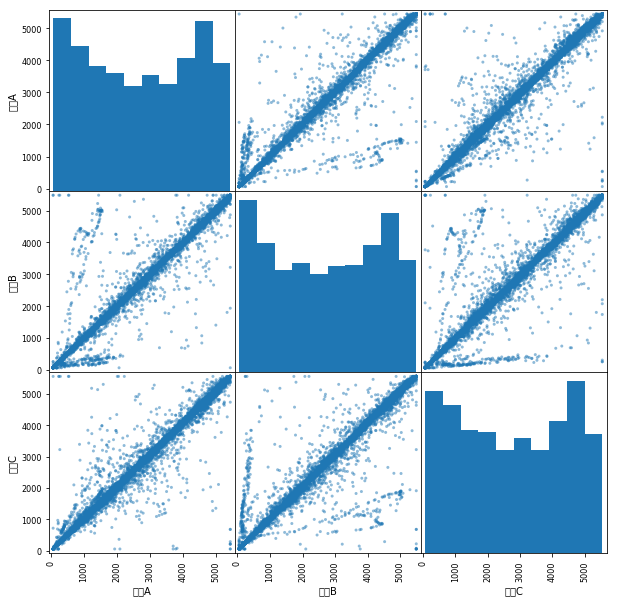

In [20]:
pd.plotting.scatter_matrix(clean_df[['功率A','功率B','功率C']],figsize=(10,10))

In [21]:
cols = ['电流A','电流B','电流C','电压A','电压B','电压C']
for c in cols:
    clean_df[c] = np.clip(clean_df[c], clean_df[c].quantile(0.01), clean_df[c].quantile(0.99))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116067278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117780e10>]], dtype=object)

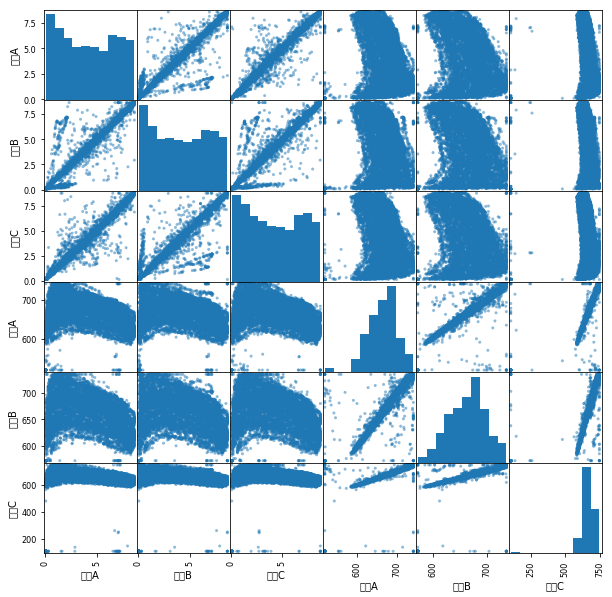

In [24]:
pd.plotting.scatter_matrix(clean_df[cols],figsize=(10,10))